# **Pekiştirmeli Öğrenme**

*   Durum,Eylem,Ödül kavramları
*   Bellman Denklemi

*   Markov karar süreci

*   Q-Öğrenme
*   Zamansal Fark









Ajan: Çevrede eylem gerçekleştiren model.

Çevre:Ajanın eylemlerini gerçekleştirdiği ortam

Durum:Ajanın içerisinde bulunduğu durum. mesela 2 boyutlu düzlemde x,y konumu

Eylem: hareket,örneğin ileri geri gitmek

**Bellman Denklemi**

> s durum değeri = a eylemi sonucu ödül + s' bir sonraki durum değeri



Q öğrenme = Bellman denklemi ile Markov karar sürecini birleştirerek hesaplama yapar.

**Zamansal Fark:** ard arda iki zamanda yapılan eylemlerin değerlerinin farkıdır.

In [ ]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
env = gym.make('FrozenLake-v1')
env

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


<TimeLimit<OrderEnforcing<StepAPICompatibility<PassiveEnvChecker<FrozenLakeEnv<FrozenLake-v1>>>>>>

In [ ]:
#Q table
q_table = np.zeros([env.observation_space.n, env.action_space.n])
q_table

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
# hyperparameter
gamma = 0.95
alpha = 0.80
epsilon= 0.10
# ödülleri görselleştirmek için bir liste oluştur
reward_list=[]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from numpy.core.overrides import array_function_from_dispatcher
episode_number = 100000
for i in range(1,episode_number):
  state = env.reset() #her bölüm başında ortamı resetliyoruz.

  reward_count =0
  while True:
    # %10 keşif, %90 sömürü oranı
    if random.uniform(0,1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(q_table[state])
    next_state,reward,done,_ =env.step(action)
    #Q öğrenme fonksiyonu
    old_value=q_table[state,action]
    next_max=np.max(q_table[next_state])
    next_value = (1-alpha)*old_value + alpha*(reward + gamma*next_max)
    #Q tablosunu güncelle
    q_table[state,action]=next_value
    #durum güncelle
    state = next_state
    #toplam ödülü hesapla
    reward_count+=reward
    #bölüm bittiyse kır ve yeni bölüme başla
    if done:
      break
if i%5000 == 0:
  print("Episode:{}".format(i))
if i%1000 == 0:
  reward_list.append(reward_count)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'ödül')

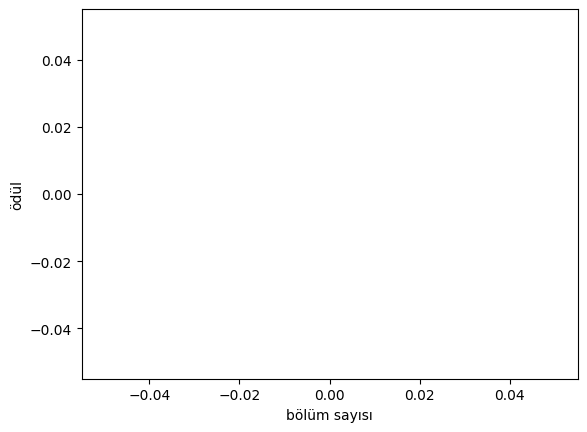

In [ ]:
plt.figure()
plt.plot(reward_list)
plt.xlabel("bölüm sayısı")
plt.ylabel("ödül")

In [ ]:
q_table

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0.21200726, 0.29864083, 0.23837867, 0.18573072],
       [0.0355717 , 0.006209  , 0.05208643, 0.30172573],
       [0.2232265 , 0.17795992, 0.58165441, 0.21553957],
       [0.05772801, 0.00126906, 0.007282  , 0.18744557],
       [0.31457779, 0.05258246, 0.1783601 , 0.00868417],
       [0.        , 0.        , 0.        , 0.        ],
       [0.10964259, 0.11115102, 0.1361569 , 0.00281149],
       [0.        , 0.        , 0.        , 0.        ],
       [0.17713087, 0.03273091, 0.11965945, 0.24413446],
       [0.29199972, 0.36583403, 0.09267386, 0.12410045],
       [0.58163084, 0.12603196, 0.03480856, 0.32672785],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.10710698, 0.17642281, 0.7408751 , 0.00309259],
       [0.30459174, 0.6919491 , 0.80437299, 0.64238219],
       [0.        , 0.        , 0.        , 0.        ]])

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#makine öğrenmesi
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.decomposition import PCA


In [ ]:
veri = pd.read_csv("data.csv")
veri.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
veri.drop(['Unnamed: 32','id'], inplace = True , axis= 1)

In [ ]:
veri = veri.rename(columns = {"diagnosis":"hedef"})

In [ ]:
veri["hedef"] = [1 if i.strip() == "M" else 0 for i in veri.hedef]
veri.head()

,hedef,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
print("verinin uzunluğu",veri.shape)

verinin uzunluğu (569, 31)


<Figure size 1200x800 with 0 Axes>

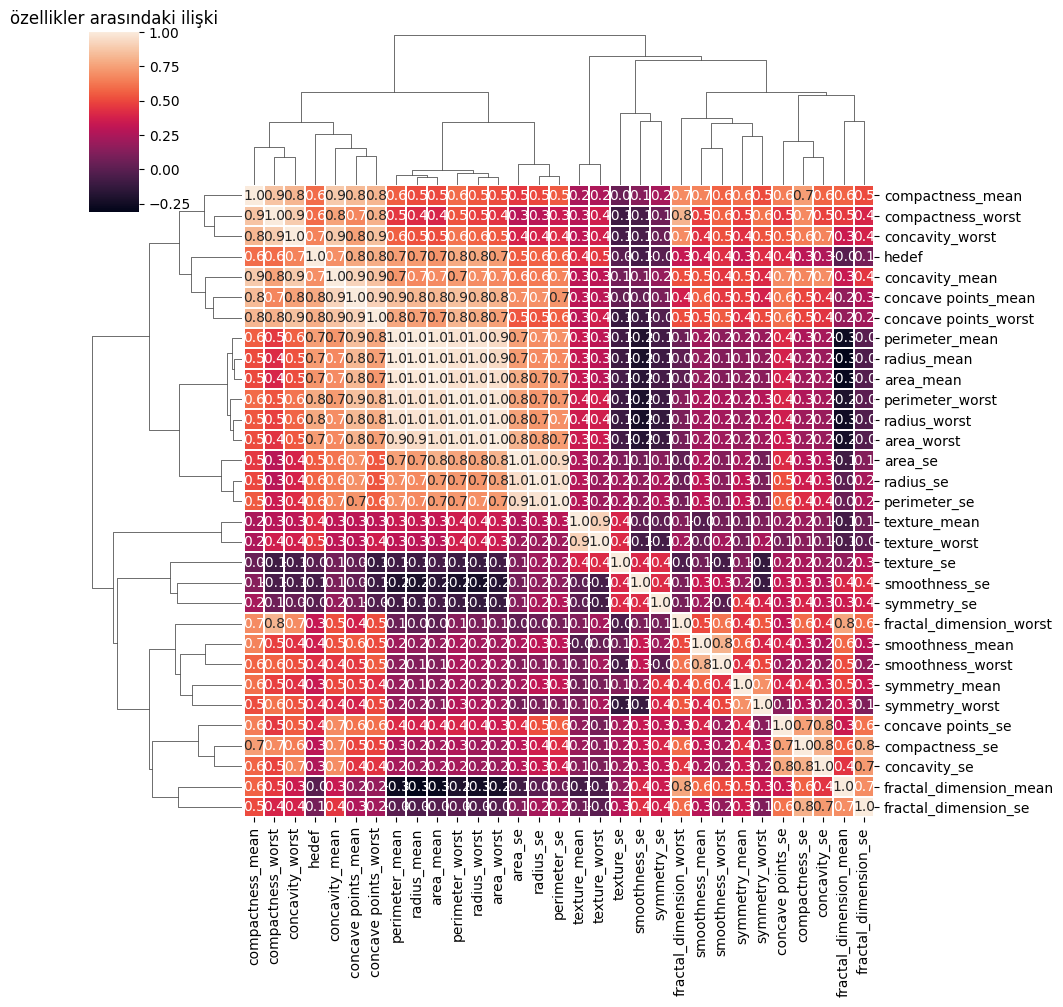

In [ ]:
corr_matrix=veri.corr()
plt.figure(figsize = (12,8))
sns.clustermap(corr_matrix, annot=True, fmt = ".1f", linewidths=.01)
plt.title("özellikler arasındaki ilişki")
plt.show()
# birbiriyle ilişkili olan özelliklerin rengi koyu.

<Figure size 640x480 with 0 Axes>

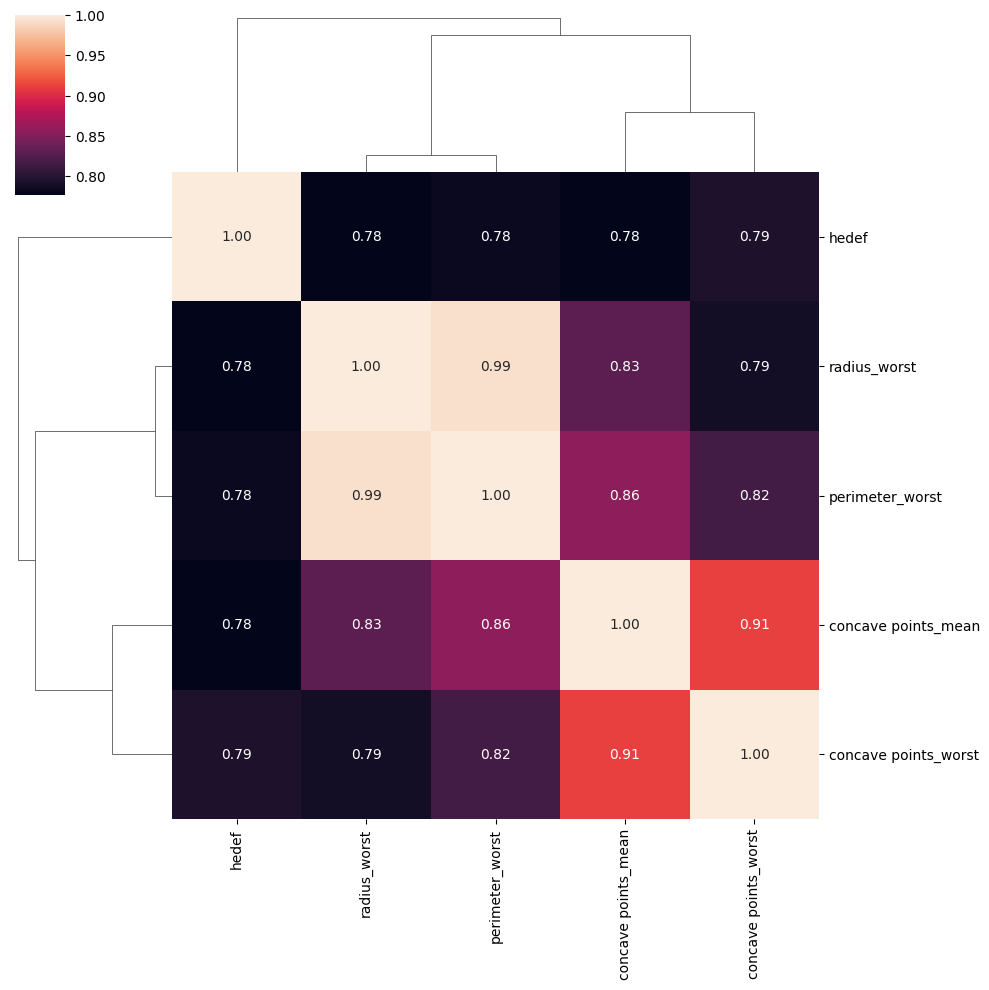

In [ ]:
# hedef ile arasındaki ilişki + / - 0.75den büyük olanlar
threshold = 0.75
filtre = np.abs(corr_matrix["hedef"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
plt.figure()
sns.clustermap(veri[corr_features].corr(), annot=True, fmt=".2f")
plt.show()

<Figure size 640x480 with 0 Axes>

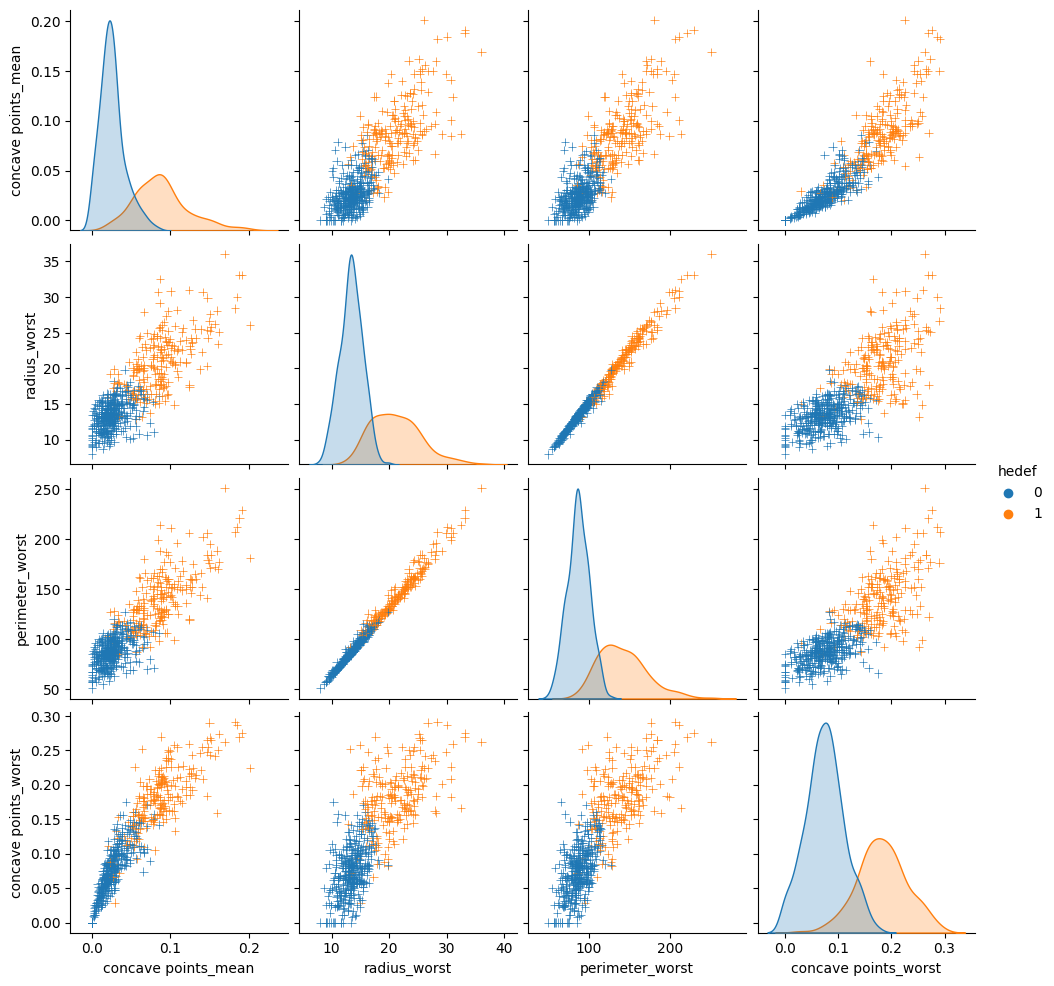

In [ ]:
# hedef ile ilişkili özelliklerin saçılımına bakalım (mavi renk iyi huylu, turuncu renk kötü huylu)
plt.figure()
sns.pairplot(veri[corr_features],
             diag_kind="kde", markers= "+", hue="hedef")
plt.show()

In [ ]:
# Aykırı değer tespiti ve çıkarılması
y=veri.hedef
x=veri.drop(["hedef"],axis=1)
columns = x.columns.tolist()

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()

y_pred = clf.fit_predict(x)
x_score = clf.negative_outlier_factor_

In [ ]:
#skoru bir veri çerçevesi yapıp içerisine ekleyelim
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

In [ ]:
threshold=-2.2 #eşik değerine göre aykırı değer bulma
filtre=outlier_score["score"]< threshold
outlier_index= outlier_score[filtre].index.tolist()

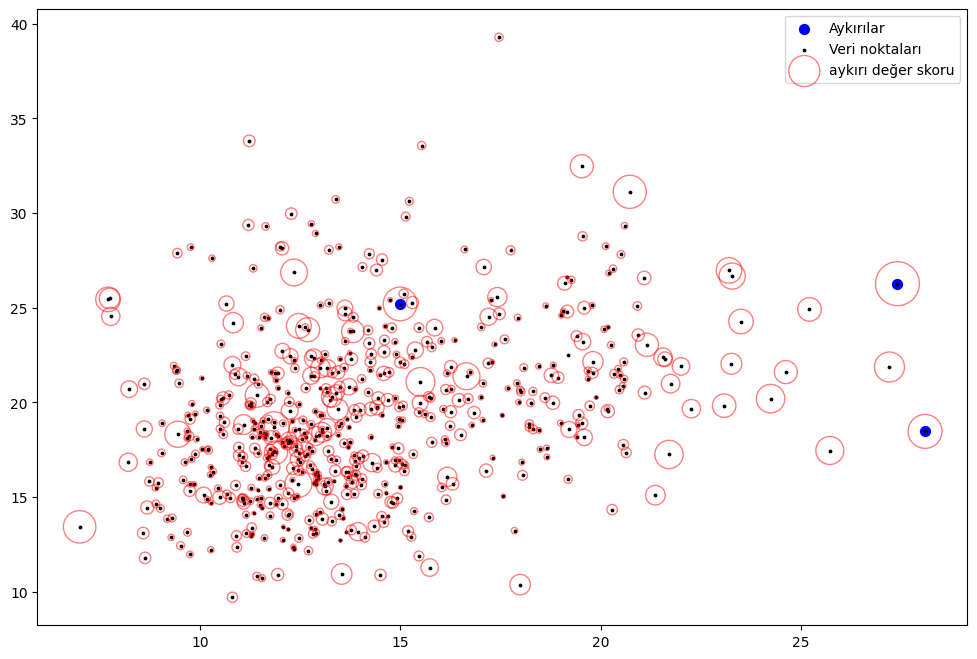

In [ ]:
#yerel aykırı faktör yöntemi ile belirlenen aykırı değerleri çıkaralım
plt.figure(figsize = (12,8))
plt.scatter(x.iloc[outlier_index,0], x.iloc[outlier_index,1],color="blue", s=50,label="Aykırılar")
plt.scatter(x.iloc[:,0], x.iloc[:,1], color = "k", s=3, label="Veri noktaları")
radius = (x_score.max() - x_score)/(x_score.max()-x_score.min())
outlier_score["radius"] = radius
plt.scatter(x.iloc[:,0],x.iloc[:,1],s=1000*radius, edgecolors="r", alpha=0.5,facecolors="none",label="aykırı değer skoru")
plt.legend()
plt.show()


In [ ]:
x=x.drop(outlier_index)
y=y.drop(outlier_index).values

In [ ]:
# eğitim test bölünmesi
x_egitim, x_test, y_egitim, y_test =train_test_split(x,y,test_size=0.3, random_state=42)

**standardizasyon**
z = (x-ortalama) / standart sapma

In [ ]:
scaler = StandardScaler()
x_egitim=scaler.fit_transform(x_egitim)
x_test=scaler.transform(x_test)

In [ ]:
# görselleştirmede kullanmak için veri çerçevesi oluşturalım.
x_egitim_df = pd.DataFrame(x_egitim, columns = columns)
x_egitim_df_describe = x_egitim_df.describe()
x_egitim_df["hedef"] = y_egitim

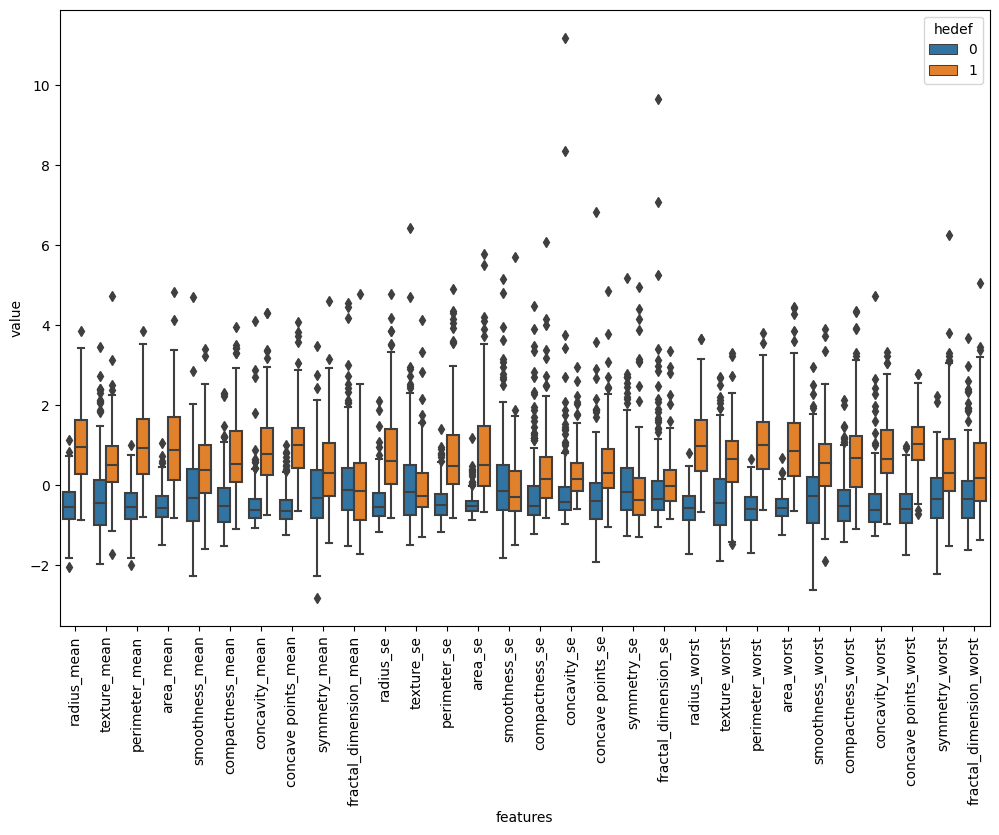

In [ ]:
#kutu grafiği
data_melted = pd.melt(x_egitim_df, id_vars = "hedef", var_name = "features", value_name= "value")
plt.figure(figsize=(12,8))
sns.boxplot(x="features", y="value",hue="hedef", data=data_melted)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# K en yakın komşu algoritması ile sınıflandıralım.
knn = KNeighborsClassifier(n_neighbors=2)
#eğitim
knn.fit(x_egitim,y_egitim)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred = knn.predict(x_test) #tahmin

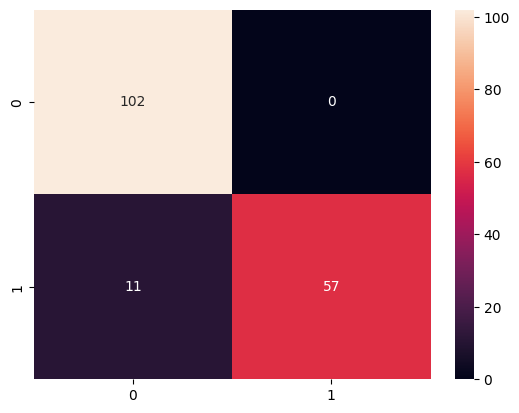

In [ ]:
#karışıklık matrisi
cm = confusion_matrix(y_test,y_pred)
plt.figure()
sns.heatmap(cm, annot=True,fmt = ".0f")
plt.show()

In [ ]:
#Doğruluk
dogruluk = accuracy_score(y_test,y_pred)
print("doğruluk: ",dogruluk)

doğruluk:  0.9352941176470588


In [ ]:
def eniyiParametreler(x_egitim,x_test,y_egitim,y_test):
  k_range = list(range(1,31)) #k degeri
  #uniform:tek tip ağırlıklar. tüm noktaklar eşit ağırlıklandırılır.
  #distance: mesafelerin tersine göre yakın olanlar daha ağırlıklı.
  weight_options = ["uniform","distance"] #farklı knn parametreleri
  #ızgara araması için parametreleri bir sözlüğe ekleyelim
  param_grid = dict(n_neighbors =k_range,weights = weight_options)
  knn = KNeighborsClassifier() # knn sınıflandırıcı
  grid = GridSearchCV(knn,param_grid,cv=10,scoring ="accuracy") # çapraz doğrulama ile ızgara arama
  #eğitim
  grid.fit(x_egitim, y_egitim)
  print("en iyi eğitim skoru: {} ve parametreler: {}".format(grid.best_score_,grid.best_params_))
  #en iyi sonucu veren parametreler ile yeni bir model
  knn = KNeighborsClassifier(**grid.best_params_)
  #eğitim
  knn.fit(x_egitim,y_egitim)
  #tahmin
  y_pred_test = knn.predict(x_test)
  y_pred_train = knn.predict(x_egitim)
  #karışıklık matrisi
  cm_test = confusion_matrix(y_test,y_pred_test)
  cm_train= confusion_matrix(y_egitim,y_pred_train)
  # doğruluk ve sonuçların yazdırılması
  acc_test = accuracy_score(y_test,y_pred_test)
  acc_train = accuracy_score(y_egitim,y_pred_train)
  print("test doğruluğu: {}, eğitim doğruluğu: {}".format(acc_test,acc_train))
  print()
  print("karışklık matrisi (test): ")
  print(cm_test)
  print("karışklık matrisi (train): ")
  print(cm_train)

  return grid

In [ ]:
grid = eniyiParametreler(x_egitim,x_test,y_egitim,y_test)

en iyi eğitim skoru: 0.972051282051282 ve parametreler: {'n_neighbors': 4, 'weights': 'distance'}
test doğruluğu: 0.9470588235294117, eğitim doğruluğu: 1.0

karışklık matrisi (test): 
[[100   2]
 [  7  61]]
karışklık matrisi (train): 
[[255   0]
 [  0 141]]
